<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [242]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline



### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [152]:
#!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

### Load Data From CSV File


In [243]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\tution books\alina urdu\loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [244]:
df.shape

(346, 10)

### Convert to date time object


In [245]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


In [246]:
print(df.corr())

              Unnamed: 0  Unnamed: 0.1  Principal     terms       age
Unnamed: 0      1.000000      1.000000   0.032456  0.061522 -0.012264
Unnamed: 0.1    1.000000      1.000000   0.032456  0.061522 -0.012264
Principal       0.032456      0.032456   1.000000  0.521876 -0.060893
terms           0.061522      0.061522   0.521876  1.000000 -0.064762
age            -0.012264     -0.012264  -0.060893 -0.064762  1.000000


Let’s see how many of each class is in our data set


In [209]:
df['loan_status'].value_counts()
df['terms'].value_counts()

30    184
15    148
7      14
Name: terms, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [247]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



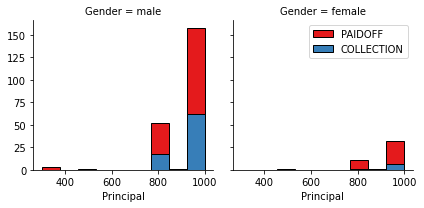

In [210]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

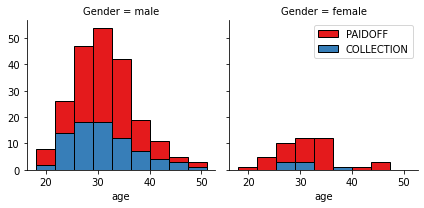

In [248]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


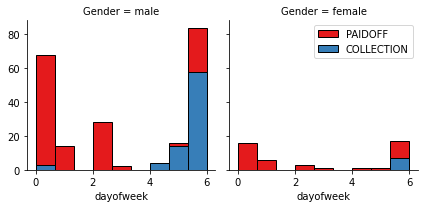

In [249]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [250]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [251]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
#df.groupby(['terms'])['loan_status'].value_counts(normalize=True)
df.groupby(['Principal'])['loan_status'].value_counts(normalize=True)

Principal  loan_status
300        PAIDOFF        1.000000
500        PAIDOFF        1.000000
800        PAIDOFF        0.777778
           COLLECTION     0.222222
900        PAIDOFF        1.000000
1000       PAIDOFF        0.736434
           COLLECTION     0.263566
Name: loan_status, dtype: float64

In [252]:
df.groupby(['age'])['loan_status'].value_counts(normalize=True)

age  loan_status
18   COLLECTION     1.000000
19   PAIDOFF        1.000000
20   PAIDOFF        1.000000
21   PAIDOFF        0.800000
     COLLECTION     0.200000
22   PAIDOFF        0.714286
     COLLECTION     0.285714
23   PAIDOFF        0.750000
     COLLECTION     0.250000
24   PAIDOFF        0.714286
     COLLECTION     0.285714
25   PAIDOFF        0.625000
     COLLECTION     0.375000
26   PAIDOFF        0.689655
     COLLECTION     0.310345
27   PAIDOFF        0.760000
     COLLECTION     0.240000
28   PAIDOFF        0.750000
     COLLECTION     0.250000
29   PAIDOFF        0.777778
     COLLECTION     0.222222
30   PAIDOFF        0.740741
     COLLECTION     0.259259
31   PAIDOFF        0.842105
     COLLECTION     0.157895
32   PAIDOFF        0.642857
     COLLECTION     0.357143
33   PAIDOFF        0.823529
     COLLECTION     0.176471
34   PAIDOFF        0.800000
     COLLECTION     0.200000
35   PAIDOFF        0.800000
     COLLECTION     0.200000
36   PAIDOFF        0.8888

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [215]:
df[['Principal','terms','age','Gender','education']].head()
Feature = df[['Principal','terms','age','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
#Feature = pd.concat([Feature,pd.get_dummies(df['Gender'])], axis=1)
#Feature = pd.concat([Feature,pd.get_dummies(df['terms'])], axis=1)
#Feature = pd.concat([Feature,pd.get_dummies(df['Principal'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()
#df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

X = Feature
X[0:5]

,Principal,terms,age,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,0,1,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,0,0,1
4,1000,30,29,1,0,0,1


## One Hot Encoding

#### How about education?


In [253]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [254]:
df.groupby(['effective_date'])['loan_status'].value_counts(normalize=True)

effective_date  loan_status
2016-09-08      PAIDOFF        1.000000
2016-09-09      COLLECTION     0.500000
                PAIDOFF        0.500000
2016-09-10      PAIDOFF        0.548387
                COLLECTION     0.451613
2016-09-11      PAIDOFF        0.608434
                COLLECTION     0.391566
2016-09-12      PAIDOFF        0.965517
                COLLECTION     0.034483
2016-09-13      PAIDOFF        1.000000
2016-09-14      PAIDOFF        1.000000
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [255]:
#df[['Principal','terms','age','Gender','education']].head()

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


### Feature Selection


Let's define feature sets, X:


What are our lables?


In [256]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [257]:
#X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

,Principal,terms,age,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,0,1,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,0,0,1
4,1000,30,29,1,0,0,1


# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


KNeighborsClassifier(n_neighbors=13)
0.7428571428571429
[0.68571429 0.74285714 0.71428571 0.77142857 0.74285714 0.71428571
 0.79411765 0.76470588 0.76470588 0.76470588]
cv_scores mean:0.7459663865546219
[0.6427731092436975, 0.6205042016806723, 0.7177310924369747, 0.6715966386554622, 0.7230252100840335, 0.7002521008403362, 0.7287394957983193, 0.7287394957983193, 0.7430252100840337, 0.7403361344537814, 0.7460504201680672, 0.7547899159663866, 0.7547899159663866, 0.7547899159663866, 0.7519327731092437, 0.7402521008403362, 0.7342857142857143, 0.7461344537815127, 0.7344537815126051, 0.7403361344537815, 0.7372268907563025, 0.737310924369748, 0.7459663865546219, 0.7458823529411764, 0.7488235294117647, 0.7460504201680672, 0.7546218487394958, 0.7402521008403362, 0.7574789915966387, 0.7517647058823529, 0.7516806722689076, 0.7545378151260504, 0.7545378151260504, 0.7573949579831932, 0.7487394957983193, 0.7515966386554622, 0.7515966386554622, 0.7487394957983193, 0.7515966386554622, 0.751596638655462

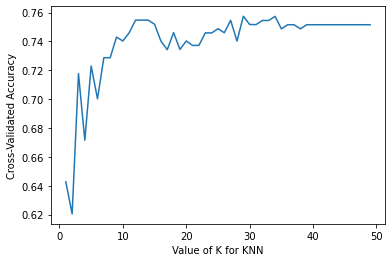

In [258]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=13)
print(neigh)
neigh.fit(X,y)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=4)
from sklearn import metrics
neigh.fit(X_train,y_train)
y_predict=neigh.predict(X_test)
print(metrics.accuracy_score(y_test,y_predict))
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=23)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))
k_range = list(range(1, 50))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
knn = KNeighborsClassifier(n_neighbors=13)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

In [259]:
knn = KNeighborsClassifier(n_neighbors=13)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.7547899159663866


In [260]:
from sklearn.metrics import classification_report,jaccard_score,log_loss,f1_score
print(classification_report(y_test,y_predict))
print('\n')
#print('Jaccard  Score : ',round(jaccard_score(y_test,y_predict)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,y_predict,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y_train, neigh.predict(X_train))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       0.20      0.07      0.10        15
     PAIDOFF       0.78      0.93      0.85        55

    accuracy                           0.74        70
   macro avg       0.49      0.50      0.48        70
weighted avg       0.66      0.74      0.69        70





F1-SCORE :  [0.1  0.85]


Train Accuracy:  77.53623188405797 %


# Decision Tree


In [328]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=4,max_depth=10, min_samples_leaf=3)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, random_state=4)

In [422]:
d_predict = clf_model.predict(X_test)

0.7


[Text(109.54852941176472, 207.55636363636364, 'X[3] <= 0.5\ngini = 0.382\nsamples = 276\nvalue = [71, 205]'),
 Text(19.694117647058825, 187.7890909090909, 'X[6] <= 0.5\ngini = 0.034\nsamples = 116\nvalue = [2, 114]'),
 Text(13.129411764705884, 168.0218181818182, 'gini = 0.0\nsamples = 71\nvalue = [0, 71]'),
 Text(26.258823529411767, 168.0218181818182, 'X[2] <= 38.5\ngini = 0.085\nsamples = 45\nvalue = [2, 43]'),
 Text(19.694117647058825, 148.25454545454545, 'X[1] <= 22.5\ngini = 0.05\nsamples = 39\nvalue = [1, 38]'),
 Text(13.129411764705884, 128.48727272727274, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(26.258823529411767, 128.48727272727274, 'X[2] <= 28.5\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(19.694117647058825, 108.72, 'X[2] <= 27.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(13.129411764705884, 88.95272727272729, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(26.258823529411767, 88.95272727272729, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text

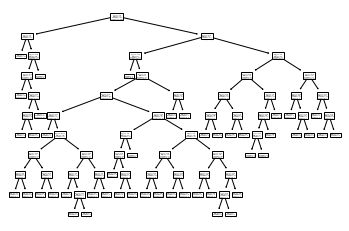

In [423]:
print(metrics.accuracy_score(y_test,d_predict))
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state = 0)
tree_clf.fit(X_train, y_train)
tree.plot_tree(clf_model)

# Support Vector Machine


In [393]:
from sklearn.svm import SVC
clf = SVC( C=1.0,                          # The regularization parameter
    kernel='linear',                   # The kernel type used 
    degree=3,                       # Degree of polynomial function 
   # gamma='scale',                  # The kernel coefficient
    coef0=0.0,                      # If kernel = 'poly'/'sigmoid'
    shrinking=True,                 # To use shrinking heuristic
    probability=False,              # Enable probability estimates
    tol=0.001,                      # Stopping crierion
    cache_size=200,                 # Size of kernel cache
    class_weight=None,              # The weight of each class
    verbose=False,                  # Enable verbose output
    max_iter=- 1,                   # Hard limit on iterations
    decision_function_shape='ovr',  # One-vs-rest or one-vs-one
    break_ties=False,               # How to handle breaking ties
    random_state=None          )
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print("Predicted: ", metrics.accuracy_score(y_test, clf_pred))









Predicted:  0.7857142857142857


# Logistic Regression


In [404]:
from sklearn.linear_model import LogisticRegression

In [408]:
 #model fit
LR = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)

In [410]:
LR_pred = LR.predict(X_test)
print("Predicted: ", metrics.accuracy_score(y_test, LR_pred))



Predicted:  0.7857142857142857


# Model Evaluation using Test set


In [32]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [412]:
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation


In [413]:
test_df = pd.read_csv(r'C:\Users\Admin\Downloads\tution books\alina urdu\loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [417]:
test_df = pd.read_csv(r'C:\Users\Admin\Downloads\tution books\alina urdu\loan_test.csv')
y_true = test_df['loan_status'].values
y_true[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [421]:
algorithm = ['KNN', 'Decision Tree', 'SVM', 'LogisticRegression']

In [430]:
knn =y_predict[0:54]
Dtree = d_predict[0:54]
LogReg = LR_pred[0:54]
svm_pred = clf_pred[0:54]
model_predictions = [knn, Dtree, svm_pred, LogReg]
print(metrics.classification_report(y_true, model_predictions[2]))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



C:\Anacoda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anacoda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anacoda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [435]:
scores = []
for i in range(4):
            scores.append([
                metrics.accuracy_score(y_true, model_predictions[i]),
                metrics.f1_score(y_true, model_predictions[i], average = 'weighted')
               # metrics.log_loss(y_true, yhat_proba[0:54])
            ])
        

In [439]:
df_score = pd.DataFrame(scores, index = algorithm, columns = ['Jaccard', 'F1-score'])
df_score

,Jaccard,F1-score
KNN,0.574074,0.592144
Decision Tree,0.574074,0.592144
SVM,0.740741,0.630418
LogisticRegression,0.740741,0.630418


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.57	       |0.59         | NA      |
| Decision Tree      | 0.57    | ?  0.59      | NA      |
| SVM                | 0.74      | ? 0.63       | NA      |
| LogisticRegression | 0.74      | ?  0.63      | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
